# Statistical Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from datascience import Table
%matplotlib inline
from IPython.display import display, Markdown, Latex
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



plt.style.use('fivethirtyeight')
sns.set()
sns.set_context('talk')

In [2]:
data = pd.read_csv('data/JAXhumane.csv')
data

,Outcome Date,Name,Species,Primary Breed,Secondary Breed,Sex,Primary Color,Secondary Color,Pattern,Age (Months),Altered,Altered before arrival,Outcome Type,Intake Date,Intake Type
0,01/01/2021,Nova,Cat,Domestic Shorthair,NaN,Female,Brown,NaN,NaN,48,No,Yes,Adoption,12/17/2020,Owner/Guardian Surrender
1,01/01/2021,Bud,Dog,Mixed Breed (Medium),NaN,Male,Black,White,NaN,36,Yes,No,Adoption,12/29/2020,Return
2,01/01/2021,Tinsel,Cat,Domestic Longhair,NaN,Female,Black,NaN,NaN,3,Yes,No,Adoption,12/04/2020,Stray
3,01/01/2021,Mustard,Cat,Domestic Shorthair,NaN,Male,Orange,White,NaN,5,Yes,No,Adoption,12/03/2020,Stray
4,01/01/2021,Dionne,Cat,Domestic Shorthair,NaN,Female,Grey,NaN,Tabby,3,Yes,No,Adoption,12/28/2020,Stray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27631,10/31/2024,Peony,Cat,Domestic Shorthair,NaN,Female,Black,NaN,NaN,2,Yes,No,Adoption,09/04/2024,Stray
27632,10/31/2024,Whisker,Cat,Domestic Shorthair,NaN,Female,Brown,NaN,Tabby,2,Yes,No,Adoption,09/07/2024,Stray
27633,10/31/2024,Sista Girl,Cat,Domestic Shorthair,NaN,Female,White,Grey,NaN,5,Yes,No,Return to Owner/Guardian,10/27/2024,Stray
27634,10/31/2024,Loyalty,Cat,Domestic Shorthair,NaN,Female,Brown,Orange,Torbie,6,Yes,No,Return to Owner/Guardian,10/27/2024,Owner/Guardian Surrender


## Data Preprocessing

In [3]:
data_cats = data[data['Species'] == 'Cat']
data_cats.head()
# data_cats.to_csv('data/data_cats.csv', index=False)


,Outcome Date,Name,Species,Primary Breed,Secondary Breed,Sex,Primary Color,Secondary Color,Pattern,Age (Months),Altered,Altered before arrival,Outcome Type,Intake Date,Intake Type
0,01/01/2021,Nova,Cat,Domestic Shorthair,NaN,Female,Brown,NaN,NaN,48,No,Yes,Adoption,12/17/2020,Owner/Guardian Surrender
2,01/01/2021,Tinsel,Cat,Domestic Longhair,NaN,Female,Black,NaN,NaN,3,Yes,No,Adoption,12/04/2020,Stray
3,01/01/2021,Mustard,Cat,Domestic Shorthair,NaN,Male,Orange,White,NaN,5,Yes,No,Adoption,12/03/2020,Stray
4,01/01/2021,Dionne,Cat,Domestic Shorthair,NaN,Female,Grey,NaN,Tabby,3,Yes,No,Adoption,12/28/2020,Stray
6,01/01/2021,Ranger,Cat,Domestic Shorthair,NaN,Female,Orange,White,Tabby,2,Yes,No,Adoption,10/25/2020,Stray


In [4]:
data_dogs = data[data['Species'] == 'Dog']
data_dogs.head()
# data_dogs.to_csv('data/data_dogs.csv', index=False)

,Outcome Date,Name,Species,Primary Breed,Secondary Breed,Sex,Primary Color,Secondary Color,Pattern,Age (Months),Altered,Altered before arrival,Outcome Type,Intake Date,Intake Type
1,01/01/2021,Bud,Dog,Mixed Breed (Medium),NaN,Male,Black,White,NaN,36,Yes,No,Adoption,12/29/2020,Return
5,01/01/2021,Kiko,Dog,Mixed Breed (Medium),NaN,Male,Black,White,NaN,31,Yes,No,Return to Owner/Guardian,01/01/2021,Stray
21,01/01/2021,Boomer,Dog,Mixed Breed (Small),NaN,Male,White,NaN,NaN,84,Yes,No,Adoption,12/26/2020,Stray
27,01/01/2021,Opal,Dog,Mixed Breed (Medium),NaN,Female,Black,White,NaN,36,No,Yes,Adoption,12/29/2020,Transfer In
28,01/01/2021,Ember,Dog,Mixed Breed (Medium),NaN,Female,White,Tan,NaN,48,Yes,No,Adoption,12/26/2020,Stray


In [5]:
df_cats = data_cats.drop(columns=['Secondary Color']).drop(columns=['Secondary Breed'])

df_cats.head()

,Outcome Date,Name,Species,Primary Breed,Sex,Primary Color,Pattern,Age (Months),Altered,Altered before arrival,Outcome Type,Intake Date,Intake Type
0,01/01/2021,Nova,Cat,Domestic Shorthair,Female,Brown,NaN,48,No,Yes,Adoption,12/17/2020,Owner/Guardian Surrender
2,01/01/2021,Tinsel,Cat,Domestic Longhair,Female,Black,NaN,3,Yes,No,Adoption,12/04/2020,Stray
3,01/01/2021,Mustard,Cat,Domestic Shorthair,Male,Orange,NaN,5,Yes,No,Adoption,12/03/2020,Stray
4,01/01/2021,Dionne,Cat,Domestic Shorthair,Female,Grey,Tabby,3,Yes,No,Adoption,12/28/2020,Stray
6,01/01/2021,Ranger,Cat,Domestic Shorthair,Female,Orange,Tabby,2,Yes,No,Adoption,10/25/2020,Stray


In [6]:
df_dogs = data_dogs.drop(columns=['Secondary Color']).drop(columns=['Secondary Breed'])
df_dogs.head()

,Outcome Date,Name,Species,Primary Breed,Sex,Primary Color,Pattern,Age (Months),Altered,Altered before arrival,Outcome Type,Intake Date,Intake Type
1,01/01/2021,Bud,Dog,Mixed Breed (Medium),Male,Black,NaN,36,Yes,No,Adoption,12/29/2020,Return
5,01/01/2021,Kiko,Dog,Mixed Breed (Medium),Male,Black,NaN,31,Yes,No,Return to Owner/Guardian,01/01/2021,Stray
21,01/01/2021,Boomer,Dog,Mixed Breed (Small),Male,White,NaN,84,Yes,No,Adoption,12/26/2020,Stray
27,01/01/2021,Opal,Dog,Mixed Breed (Medium),Female,Black,NaN,36,No,Yes,Adoption,12/29/2020,Transfer In
28,01/01/2021,Ember,Dog,Mixed Breed (Medium),Female,White,NaN,48,Yes,No,Adoption,12/26/2020,Stray


In [7]:
cat_color_counts = df_cats['Primary Color'].value_counts()
cat_color_counts

Primary Color
Black                      5765
Grey                       3346
Brown                      2978
Orange                     1724
White                      1239
Calico                      614
Tan                         309
Tortoise                    292
Cream                       188
Torbie                      113
Seal                         54
Apricot                      47
Buff                         38
Albino                       34
Silver                       21
Yellow                       19
Lilac                        18
Blue                         15
Blonde                       14
Copper                        9
Lynx                          9
Chocolate                     8
Fawn                          8
Salt & Pepper                 7
Liver                         7
Flame                         6
Charcoal                      5
Wheaten                       5
Red                           4
Smoke                         2
Mahogany                  

In [8]:
dog_color_counts = df_dogs['Primary Color'].value_counts()
dog_color_counts

Primary Color
Black           2913
Brown           1984
Tan             1883
White           1643
Grey             769
Brindle          630
Red/Mahogany     150
Chocolate        111
Golden           102
Blue              74
Beige             73
Cream             72
Blond             71
Fawn              69
Wheaten           62
Sandy             48
Apricot           23
Yellow            20
Silver            16
Sable             11
Blue Black         9
Name: count, dtype: int64

In [9]:
cat_breed_counts = data_cats['Primary Breed'].value_counts()
cat_breed_counts

Primary Breed
Domestic Shorthair      15535
Domestic Medium Hair     1002
Domestic Longhair         358
American Shorthair          7
Siamese                     1
Name: count, dtype: int64

In [10]:
dog_breed_counts = data_dogs['Primary Breed'].value_counts()
dog_breed_counts

Primary Breed
Mixed Breed (Medium)         5628
Mixed Breed (Large)          2548
Mixed Breed (Small)          2546
Boxer                           2
Retriever, Black Labrador       2
Terrier                         2
Hound, Bloodhound               1
Hound, Basset                   1
Retriever, Labrador             1
Beagle                          1
Pekingese                       1
Name: count, dtype: int64

In [11]:
cat_outcome_counts = data_cats['Outcome Type'].value_counts()
cat_outcome_counts

Outcome Type
Adoption                    16695
Return to Owner/Guardian      208
Name: count, dtype: int64

In [12]:
dog_outcome_counts = data_dogs['Outcome Type'].value_counts()
dog_outcome_counts

Outcome Type
Adoption                    9537
Return to Owner/Guardian    1196
Name: count, dtype: int64

In [13]:
cat_intake_counts = data_cats['Intake Type'].value_counts()
cat_intake_counts

Intake Type
Stray                       11853
Owner/Guardian Surrender     3018
Transfer In                  1316
Return                        681
Service In                     23
Born In Care                   11
Wildlife In                     1
Name: count, dtype: int64

In [14]:
dog_intake_counts = data_dogs['Intake Type'].value_counts()
dog_intake_counts

Intake Type
Stray                       6009
Owner/Guardian Surrender    2672
Return                      1219
Transfer In                  727
Service In                   100
Born In Care                   6
Name: count, dtype: int64

## Color Stats-CATS

In [15]:
target_color_blk = 'Black'  


cat_color_counts = data_cats[data_cats['Primary Color'] == target_color_blk].shape[0]


cats_total_count = data_cats.shape[0]


if cats_total_count > 0:
    percentage = (cat_color_counts / cats_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_color_blk} in the dataset is: {percentage:.2f}%")

The percentage of Black in the dataset is: 34.11%


In [16]:
target_color_gry = 'Grey'  


cat_color_counts = data_cats[data_cats['Primary Color'] == target_color_gry].shape[0]


cats_total_count = data_cats.shape[0]


if cats_total_count > 0:
    percentage = (cat_color_counts / cats_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_color_gry} in the dataset is: {percentage:.2f}%")

The percentage of Grey in the dataset is: 19.80%


In [17]:
target_color_brn = 'Brown'  


cat_color_counts = data_cats[data_cats['Primary Color'] == target_color_brn].shape[0]


cats_total_count = data_cats.shape[0]


if cats_total_count > 0:
    percentage = (cat_color_counts / cats_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_color_brn} in the dataset is: {percentage:.2f}%")

The percentage of Brown in the dataset is: 17.62%


In [18]:
target_color_org = 'Orange'  


cat_color_counts = data_cats[data_cats['Primary Color'] == target_color_org].shape[0]


cats_total_count = data_cats.shape[0]


if cats_total_count > 0:
    percentage = (cat_color_counts / cats_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_color_org} in the dataset is: {percentage:.2f}%")

The percentage of Orange in the dataset is: 10.20%


In [19]:
target_color_wht = 'White'  


cat_color_counts = data_cats[data_cats['Primary Color'] == target_color_wht].shape[0]


cats_total_count = data_cats.shape[0]


if cats_total_count > 0:
    percentage = (cat_color_counts / cats_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_color_wht} in the dataset is: {percentage:.2f}%")

The percentage of White in the dataset is: 7.33%


In [20]:
target_color_cali = 'Calico'  


cat_color_counts = data_cats[data_cats['Primary Color'] == target_color_cali].shape[0]


cats_total_count = data_cats.shape[0]


if cats_total_count > 0:
    percentage = (cat_color_counts / cats_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_color_cali} in the dataset is: {percentage:.2f}%")

The percentage of Calico in the dataset is: 3.63%


## Color Stats-DOGS

In [21]:
target_color_blk = 'Black'  


dog_color_counts = data_dogs[data_dogs['Primary Color'] == target_color_blk].shape[0]


dogs_total_count = data_dogs.shape[0]


if dogs_total_count > 0:
    percentage = (dog_color_counts / dogs_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_color_blk} in the dataset is: {percentage:.2f}%")

The percentage of Black in the dataset is: 27.14%


In [22]:
target_color_brn = 'Brown'  


dog_color_counts = data_dogs[data_dogs['Primary Color'] == target_color_brn].shape[0]


dogs_total_count = data_dogs.shape[0]


if dogs_total_count > 0:
    percentage = (dog_color_counts / dogs_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_color_brn} in the dataset is: {percentage:.2f}%")

The percentage of Brown in the dataset is: 18.49%


In [23]:
target_color_tan = 'Tan'  


dog_color_counts = data_dogs[data_dogs['Primary Color'] == target_color_tan].shape[0]


dogs_total_count = data_dogs.shape[0]


if dogs_total_count > 0:
    percentage = (dog_color_counts / dogs_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_color_tan} in the dataset is: {percentage:.2f}%")

The percentage of Tan in the dataset is: 17.54%


In [24]:
target_color_wht = 'White'  


dog_color_counts = data_dogs[data_dogs['Primary Color'] == target_color_wht].shape[0]


dogs_total_count = data_dogs.shape[0]


if dogs_total_count > 0:
    percentage = (dog_color_counts / dogs_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_color_wht} in the dataset is: {percentage:.2f}%")

The percentage of White in the dataset is: 15.31%


In [25]:
target_color_grey = 'Grey'  


dog_color_counts = data_dogs[data_dogs['Primary Color'] == target_color_grey].shape[0]


dogs_total_count = data_dogs.shape[0]


if dogs_total_count > 0:
    percentage = (dog_color_counts / dogs_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_color_grey} in the dataset is: {percentage:.2f}%")

The percentage of Grey in the dataset is: 7.16%


In [26]:
target_color_brindle = 'Brindle'  


dog_color_counts = data_dogs[data_dogs['Primary Color'] == target_color_brindle].shape[0]


dogs_total_count = data_dogs.shape[0]


if dogs_total_count > 0:
    percentage = (dog_color_counts / dogs_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_color_brindle} in the dataset is: {percentage:.2f}%")

The percentage of Brindle in the dataset is: 5.87%


In [27]:
target_color_red = 'Red/Mahogany'  


dog_color_counts = data_dogs[data_dogs['Primary Color'] == target_color_red].shape[0]


dogs_total_count = data_dogs.shape[0]


if dogs_total_count > 0:
    percentage = (dog_color_counts / dogs_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_color_red} in the dataset is: {percentage:.2f}%")

The percentage of Red/Mahogany in the dataset is: 1.40%


In [28]:
target_color_choc = 'Chocolate'  


dog_color_counts = data_dogs[data_dogs['Primary Color'] == target_color_choc].shape[0]


dogs_total_count = data_dogs.shape[0]


if dogs_total_count > 0:
    percentage = (dog_color_counts / dogs_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_color_choc} in the dataset is: {percentage:.2f}%")

The percentage of Chocolate in the dataset is: 1.03%


In [29]:
target_color_gld = 'Golden'  


dog_color_counts = data_dogs[data_dogs['Primary Color'] == target_color_gld].shape[0]


dogs_total_count = data_dogs.shape[0]


if dogs_total_count > 0:
    percentage = (dog_color_counts / dogs_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_color_gld} in the dataset is: {percentage:.2f}%")

The percentage of Golden in the dataset is: 0.95%


## Breed Stats-CATS

In [30]:
target_breed_DSH = 'Domestic Shorthair'  


cat_breed_counts = data_cats[data_cats['Primary Breed'] == target_breed_DSH].shape[0]


cats_total_count = data_cats.shape[0]


if cats_total_count > 0:
    percentage = (cat_breed_counts / cats_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_breed_DSH} in the dataset is: {percentage:.2f}%")

The percentage of Domestic Shorthair in the dataset is: 91.91%


In [31]:
target_breed_DMH = 'Domestic Medium Hair'  


cat_breed_counts = data_cats[data_cats['Primary Breed'] == target_breed_DMH].shape[0]


cats_total_count = data_cats.shape[0]


if cats_total_count > 0:
    percentage = (cat_breed_counts / cats_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_breed_DMH} in the dataset is: {percentage:.2f}%")

The percentage of Domestic Medium Hair in the dataset is: 5.93%


In [32]:
target_breed_DLH = 'Domestic Longhair'  


cat_breed_counts = data_cats[data_cats['Primary Breed'] == target_breed_DLH].shape[0]


cats_total_count = data_cats.shape[0]


if cats_total_count > 0:
    percentage = (cat_breed_counts / cats_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_breed_DLH} in the dataset is: {percentage:.2f}%")

The percentage of Domestic Longhair in the dataset is: 2.12%


## Breed Stats-DOGS


In [33]:
target_breed_MBM = 'Mixed Breed (Medium)'  


dog_breed_counts = data_dogs[data_dogs['Primary Breed'] == target_breed_MBM].shape[0]


dogs_total_count = data_dogs.shape[0]


if cats_total_count > 0:
    percentage = (dog_breed_counts / dogs_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_breed_MBM} in the dataset is: {percentage:.2f}%")

The percentage of Mixed Breed (Medium) in the dataset is: 52.44%


In [34]:
target_breed_MBL = 'Mixed Breed (Large)'  


dog_breed_counts = data_dogs[data_dogs['Primary Breed'] == target_breed_MBL].shape[0]


dogs_total_count = data_dogs.shape[0]


if cats_total_count > 0:
    percentage = (dog_breed_counts / dogs_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_breed_MBL} in the dataset is: {percentage:.2f}%")

The percentage of Mixed Breed (Large) in the dataset is: 23.74%


In [35]:
target_breed_MBS = 'Mixed Breed (Small)'  


dog_breed_counts = data_dogs[data_dogs['Primary Breed'] == target_breed_MBS].shape[0]


dogs_total_count = data_dogs.shape[0]


if cats_total_count > 0:
    percentage = (dog_breed_counts / dogs_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_breed_MBS} in the dataset is: {percentage:.2f}%")

The percentage of Mixed Breed (Small) in the dataset is: 23.72%


## Outcome stats-CATS

In [36]:
target_outcome_adp = 'Adoption'  


cat_outcome_counts = data_cats[data_cats['Outcome Type'] == target_outcome_adp].shape[0]


cats_total_count = data_cats.shape[0]


if cats_total_count > 0:
    percentage = (cat_outcome_counts / cats_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_outcome_adp} in the dataset is: {percentage:.2f}%")

The percentage of Adoption in the dataset is: 98.77%


In [37]:
target_outcome_RTO = 'Return to Owner/Guardian'  


cat_outcome_counts = data_cats[data_cats['Outcome Type'] == target_outcome_RTO].shape[0]


cats_total_count = data_cats.shape[0]


if cats_total_count > 0:
    percentage = (cat_outcome_counts / cats_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_outcome_RTO} in the dataset is: {percentage:.2f}%")

The percentage of Return to Owner/Guardian in the dataset is: 1.23%


## Outcome Stats-DOGS

In [38]:
target_outcome_adp = 'Adoption'  


dog_outcome_counts = data_dogs[data_dogs['Outcome Type'] == target_outcome_adp].shape[0]


dogs_total_count = data_dogs.shape[0]


if dogs_total_count > 0:
    percentage = (dog_outcome_counts / dogs_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_outcome_adp} in the dataset is: {percentage:.2f}%")

The percentage of Adoption in the dataset is: 88.86%


In [39]:
target_outcome_RTO = 'Return to Owner/Guardian'  


dog_outcome_counts = data_dogs[data_dogs['Outcome Type'] == target_outcome_RTO].shape[0]


dogs_total_count = data_dogs.shape[0]


if dogs_total_count > 0:
    percentage = (dog_outcome_counts / dogs_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_outcome_RTO} in the dataset is: {percentage:.2f}%")

The percentage of Return to Owner/Guardian in the dataset is: 11.14%


## Intake Stats-CATS

In [40]:
cat_intake_counts = data_cats['Intake Type'].value_counts()
cat_intake_counts

Intake Type
Stray                       11853
Owner/Guardian Surrender     3018
Transfer In                  1316
Return                        681
Service In                     23
Born In Care                   11
Wildlife In                     1
Name: count, dtype: int64

In [41]:
target_intake_stray = 'Stray'  


cat_intake_counts = data_cats[data_cats['Intake Type'] == target_intake_stray].shape[0]


cats_total_count = data_cats.shape[0]


if cats_total_count > 0:
    percentage = (cat_intake_counts / cats_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_intake_stray} in the dataset is: {percentage:.2f}%")

The percentage of Stray in the dataset is: 70.12%


In [42]:
target_intake_ownsurr = 'Owner/Guardian Surrender'  


cat_intake_counts = data_cats[data_cats['Intake Type'] == target_intake_ownsurr].shape[0]


cats_total_count = data_cats.shape[0]


if cats_total_count > 0:
    percentage = (cat_intake_counts / cats_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_intake_ownsurr} in the dataset is: {percentage:.2f}%")

The percentage of Owner/Guardian Surrender in the dataset is: 17.85%


In [43]:
target_intake_trans = 'Transfer In'  


cat_intake_counts = data_cats[data_cats['Intake Type'] == target_intake_trans].shape[0]


cats_total_count = data_cats.shape[0]


if cats_total_count > 0:
    percentage = (cat_intake_counts / cats_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_intake_trans} in the dataset is: {percentage:.2f}%")

The percentage of Transfer In in the dataset is: 7.79%


In [44]:
target_intake_rtn = 'Return'  


cat_intake_counts = data_cats[data_cats['Intake Type'] == target_intake_rtn].shape[0]


cats_total_count = data_cats.shape[0]


if cats_total_count > 0:
    percentage = (cat_intake_counts / cats_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_intake_rtn} in the dataset is: {percentage:.2f}%")

The percentage of Return in the dataset is: 4.03%


In [45]:
target_intake_serv = 'Service In'  


cat_intake_counts = data_cats[data_cats['Intake Type'] == target_intake_serv].shape[0]


cats_total_count = data_cats.shape[0]


if cats_total_count > 0:
    percentage = (cat_intake_counts / cats_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_intake_serv} in the dataset is: {percentage:.2f}%")

The percentage of Service In in the dataset is: 0.14%


In [46]:
target_intake_bic = 'Born In Care'  


cat_intake_counts = data_cats[data_cats['Intake Type'] == target_intake_bic].shape[0]


cats_total_count = data_cats.shape[0]


if cats_total_count > 0:
    percentage = (cat_intake_counts / cats_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_intake_bic} in the dataset is: {percentage:.2f}%")

The percentage of Born In Care in the dataset is: 0.07%


## Intake Stats- DOGS

In [47]:
dog_intake_counts = data_dogs['Intake Type'].value_counts()
dog_intake_counts

Intake Type
Stray                       6009
Owner/Guardian Surrender    2672
Return                      1219
Transfer In                  727
Service In                   100
Born In Care                   6
Name: count, dtype: int64

In [48]:
target_intake_stray = 'Stray'  


dog_intake_counts = data_dogs[data_dogs['Intake Type'] == target_intake_stray].shape[0]


dogs_total_count = data_dogs.shape[0]


if dogs_total_count > 0:
    percentage = (dog_intake_counts / dogs_total_count) * 100
else:
    percentage = 0


print(f"The percentage of {target_intake_stray} in the dataset is: {percentage:.2f}%")

The percentage of Stray in the dataset is: 55.99%


In [49]:
target_intake_ownsurr = 'Owner/Guardian Surrender'  


dog_intake_counts = data_dogs[data_dogs['Intake Type'] == target_intake_ownsurr].shape[0]


dogs_total_count = data_dogs.shape[0]


if dogs_total_count > 0:
    percentage = (dog_intake_counts / dogs_total_count) * 100
else:
    percentage = 0

print(f"The percentage of {target_intake_ownsurr} in the dataset is: {percentage:.2f}%")

The percentage of Owner/Guardian Surrender in the dataset is: 24.90%


In [50]:
target_intake_rtn = 'Return'  


dog_intake_counts = data_dogs[data_dogs['Intake Type'] == target_intake_rtn].shape[0]


dogs_total_count = data_dogs.shape[0]


if dogs_total_count > 0:
    percentage = (dog_intake_counts / dogs_total_count) * 100
else:
    percentage = 0

print(f"The percentage of {target_intake_rtn} in the dataset is: {percentage:.2f}%")

The percentage of Return in the dataset is: 11.36%


In [51]:
target_intake_trans = 'Transfer In'  


dog_intake_counts = data_dogs[data_dogs['Intake Type'] == target_intake_trans].shape[0]


dogs_total_count = data_dogs.shape[0]


if dogs_total_count > 0:
    percentage = (dog_intake_counts / dogs_total_count) * 100
else:
    percentage = 0

print(f"The percentage of {target_intake_trans} in the dataset is: {percentage:.2f}%")

The percentage of Transfer In in the dataset is: 6.77%


In [52]:
target_intake_serv = 'Service In'  


dog_intake_counts = data_dogs[data_dogs['Intake Type'] == target_intake_serv].shape[0]


dogs_total_count = data_dogs.shape[0]


if dogs_total_count > 0:
    percentage = (dog_intake_counts / dogs_total_count) * 100
else:
    percentage = 0

print(f"The percentage of {target_intake_serv} in the dataset is: {percentage:.2f}%")

The percentage of Service In in the dataset is: 0.93%


In [53]:
target_intake_bic = 'Born In Care'  


dog_intake_counts = data_dogs[data_dogs['Intake Type'] == target_intake_bic].shape[0]


dogs_total_count = data_dogs.shape[0]


if dogs_total_count > 0:
    percentage = (dog_intake_counts / dogs_total_count) * 100
else:
    percentage = 0

print(f"The percentage of {target_intake_bic} in the dataset is: {percentage:.2f}%")

The percentage of Born In Care in the dataset is: 0.06%


## Length of Stay added

In [54]:
df_cats['Intake Date'] = pd.to_datetime(df_cats['Intake Date'])
df_cats['Outcome Date'] = pd.to_datetime(df_cats['Outcome Date'])


df_cats['length of stay'] = (df_cats['Outcome Date'] - df_cats['Intake Date']).dt.days

df_cats

,Outcome Date,Name,Species,Primary Breed,Sex,Primary Color,Pattern,Age (Months),Altered,Altered before arrival,Outcome Type,Intake Date,Intake Type,length of stay
0,2021-01-01,Nova,Cat,Domestic Shorthair,Female,Brown,NaN,48,No,Yes,Adoption,2020-12-17,Owner/Guardian Surrender,15
2,2021-01-01,Tinsel,Cat,Domestic Longhair,Female,Black,NaN,3,Yes,No,Adoption,2020-12-04,Stray,28
3,2021-01-01,Mustard,Cat,Domestic Shorthair,Male,Orange,NaN,5,Yes,No,Adoption,2020-12-03,Stray,29
4,2021-01-01,Dionne,Cat,Domestic Shorthair,Female,Grey,Tabby,3,Yes,No,Adoption,2020-12-28,Stray,4
6,2021-01-01,Ranger,Cat,Domestic Shorthair,Female,Orange,Tabby,2,Yes,No,Adoption,2020-10-25,Stray,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27631,2024-10-31,Peony,Cat,Domestic Shorthair,Female,Black,NaN,2,Yes,No,Adoption,2024-09-04,Stray,57
27632,2024-10-31,Whisker,Cat,Domestic Shorthair,Female,Brown,Tabby,2,Yes,No,Adoption,2024-09-07,Stray,54
27633,2024-10-31,Sista Girl,Cat,Domestic Shorthair,Female,White,NaN,5,Yes,No,Return to Owner/Guardian,2024-10-27,Stray,4
27634,2024-10-31,Loyalty,Cat,Domestic Shorthair,Female,Brown,Torbie,6,Yes,No,Return to Owner/Guardian,2024-10-27,Owner/Guardian Surrender,4


In [55]:
df_dogs['Intake Date'] = pd.to_datetime(df_dogs['Intake Date'])
df_dogs['Outcome Date'] = pd.to_datetime(df_dogs['Outcome Date'])


df_dogs['length of stay'] = (df_dogs['Outcome Date'] - df_dogs['Intake Date']).dt.days

df_dogs

,Outcome Date,Name,Species,Primary Breed,Sex,Primary Color,Pattern,Age (Months),Altered,Altered before arrival,Outcome Type,Intake Date,Intake Type,length of stay
1,2021-01-01,Bud,Dog,Mixed Breed (Medium),Male,Black,NaN,36,Yes,No,Adoption,2020-12-29,Return,3
5,2021-01-01,Kiko,Dog,Mixed Breed (Medium),Male,Black,NaN,31,Yes,No,Return to Owner/Guardian,2021-01-01,Stray,0
21,2021-01-01,Boomer,Dog,Mixed Breed (Small),Male,White,NaN,84,Yes,No,Adoption,2020-12-26,Stray,6
27,2021-01-01,Opal,Dog,Mixed Breed (Medium),Female,Black,NaN,36,No,Yes,Adoption,2020-12-29,Transfer In,3
28,2021-01-01,Ember,Dog,Mixed Breed (Medium),Female,White,NaN,48,Yes,No,Adoption,2020-12-26,Stray,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27622,2024-10-31,Cinnamon Squirrel,Dog,Mixed Breed (Small),Male,Tan,NaN,60,Yes,No,Adoption,2024-10-24,Stray,7
27623,2024-10-31,Ember,Dog,Mixed Breed (Small),Male,Tan,NaN,6,Yes,No,Adoption,2024-10-24,Stray,7
27627,2024-10-31,Karen Smith,Dog,Mixed Breed (Small),Female,Black,NaN,14,Yes,No,Adoption,2024-10-26,Transfer In,5
27628,2024-10-31,Ziggy Stardust,Dog,Mixed Breed (Large),Male,Black,NaN,24,Yes,No,Adoption,2024-10-22,Stray,9


### DESCRIBE

In [56]:
df_cats.describe()

,Outcome Date,Age (Months),Intake Date,length of stay
count,16903,16903.000000,16903,16903.000000
mean,2022-12-28 12:13:40.398745856,11.667515,2022-12-05 21:27:09.935514624,22.615630
min,2021-01-01 00:00:00,1.000000,2020-08-11 00:00:00,0.000000
25%,2021-12-16 00:00:00,2.000000,2021-11-27 00:00:00,4.000000
50%,2022-12-01 00:00:00,2.000000,2022-11-08 00:00:00,14.000000
75%,2023-11-28 00:00:00,6.000000,2023-11-09 00:00:00,36.000000
max,2024-10-31 00:00:00,204.000000,2024-10-31 00:00:00,287.000000
std,NaN,22.758136,NaN,22.935515


In [57]:
df_dogs.describe()

,Outcome Date,Age (Months),Intake Date,length of stay
count,10733,10733.000000,10733,10733.000000
mean,2022-11-20 01:52:49.999068160,36.202926,2022-11-07 22:56:08.228826880,12.122706
min,2021-01-01 00:00:00,1.000000,2020-08-05 00:00:00,0.000000
25%,2021-12-17 00:00:00,12.000000,2021-12-07 00:00:00,3.000000
50%,2022-11-15 00:00:00,24.000000,2022-10-31 00:00:00,6.000000
75%,2023-10-21 00:00:00,50.000000,2023-10-09 00:00:00,13.000000
max,2024-10-31 00:00:00,220.000000,2024-10-28 00:00:00,323.000000
std,NaN,32.955278,NaN,18.798194


### Length of Stay by color


In [58]:
los_by_color_cats = (
    df_cats.groupby('Primary Color')['length of stay']
    .mean()
    .reset_index()
    .sort_values(by='length of stay', ascending=False)
)

los_by_color_cats

,Primary Color,length of stay
16,Lilac,38.833333
23,Salt & Pepper,38.571429
7,Buff,35.973684
18,Lynx,34.111111
24,Seal,29.851852
13,Fawn,27.750000
32,Wheaten,25.400000
22,Ruddy,24.000000
29,Tan,23.527508
14,Flame,23.500000


### NEW CHART W/ LENGTH OF STAY BY COLOR CATS

/var/folders/t5/ksv476hn4cq52bmfy8685cnh0000gn/T/ipykernel_44162/1618523317.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




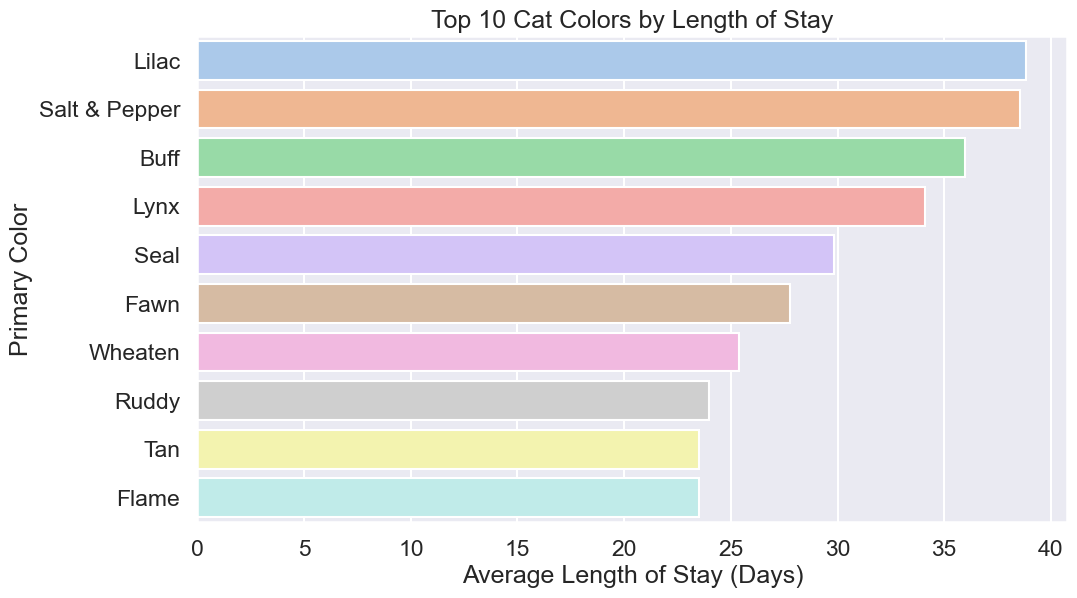

In [59]:
top_10_colors_cats = los_by_color_cats.head(10)

# Sort in descending order (longest stay at the top)
top_10_colors_cats = top_10_colors_cats.sort_values(by="length of stay", ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(
    x="length of stay", 
    y="Primary Color", 
    data=top_10_colors_cats, 
    palette="pastel", 
    order=top_10_colors_cats["Primary Color"]  # Force correct order
)

# Add labels and title
plt.xlabel("Average Length of Stay (Days)")
plt.ylabel("Primary Color")
plt.title("Top 10 Cat Colors by Length of Stay")

# Show the plot
plt.show()

In [60]:
los_by_color_dogs = (
    df_dogs.groupby('Primary Color')['length of stay']
    .mean()
    .reset_index()
    .sort_values(by='length of stay', ascending=False)
)

los_by_color_dogs

,Primary Color,length of stay
5,Blue Black,20.555556
10,Fawn,16.000000
4,Blue,15.756757
6,Brindle,14.782540
14,Sable,14.636364
12,Grey,13.507152
13,Red/Mahogany,12.993333
2,Black,12.355990
19,White,12.078515
7,Brown,11.949597


In [61]:
los_by_color_dogs = los_by_color_dogs.sort_values(by='length of stay', ascending=False)

### NEW CHART W/ LENGTH OF STAY BY COLORS DOGS

/var/folders/t5/ksv476hn4cq52bmfy8685cnh0000gn/T/ipykernel_44162/3167419136.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




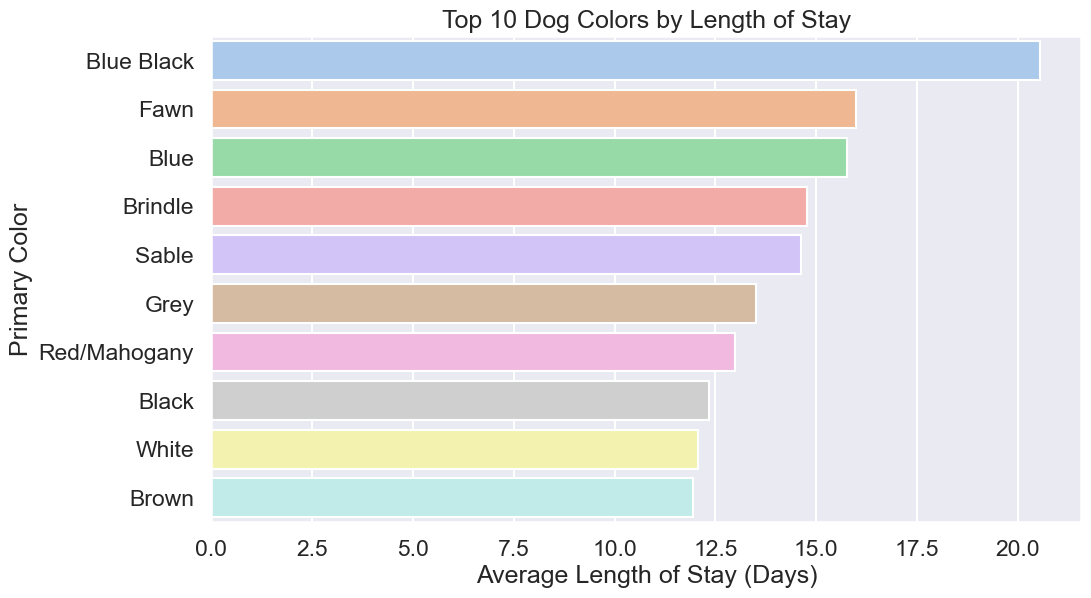

In [62]:
top_10_colors = los_by_color_dogs.head(10)

# Sort in descending order (longest stay at the top)
top_10_colors = top_10_colors.sort_values(by="length of stay", ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(
    x="length of stay", 
    y="Primary Color", 
    data=top_10_colors, 
    palette="pastel", 
    order=top_10_colors["Primary Color"]  # Force correct order
)

# Add labels and title
plt.xlabel("Average Length of Stay (Days)")
plt.ylabel("Primary Color")
plt.title("Top 10 Dog Colors by Length of Stay")

# Show the plot
plt.show()



## Age


/var/folders/t5/ksv476hn4cq52bmfy8685cnh0000gn/T/ipykernel_44162/2269662865.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




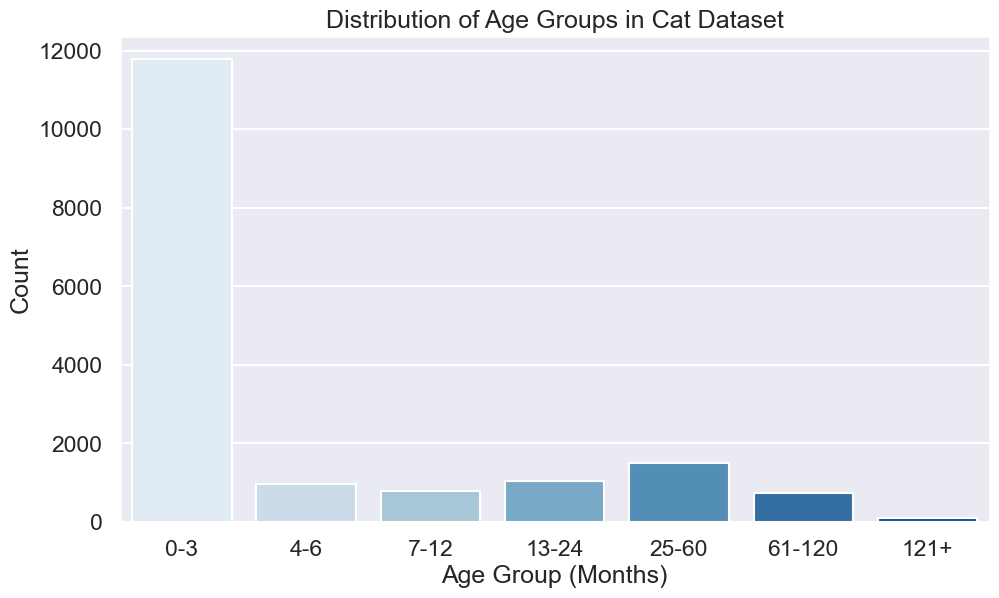

In [63]:
bins = [0, 3, 6, 12, 24, 60, 120, 204]  
bin_labels = ["0-3", "4-6", "7-12", "13-24", "25-60", "61-120", "121+"]  


df_cats["Age Group"] = pd.cut(df_cats["Age (Months)"], bins=bins, labels=bin_labels, include_lowest=True)

age_counts = df_cats["Age Group"].value_counts().sort_index()

plt.figure(figsize=(10, 6)) 
sns.barplot(x=age_counts.index, y=age_counts.values, palette="Blues")
plt.xlabel("Age Group (Months)")
plt.ylabel("Count")
plt.title("Distribution of Age Groups in Cat Dataset")
plt.xticks(rotation=0)  

plt.show()


In [64]:
df_cats["Age (Years)"] = df_cats["Age (Months)"] / 12  


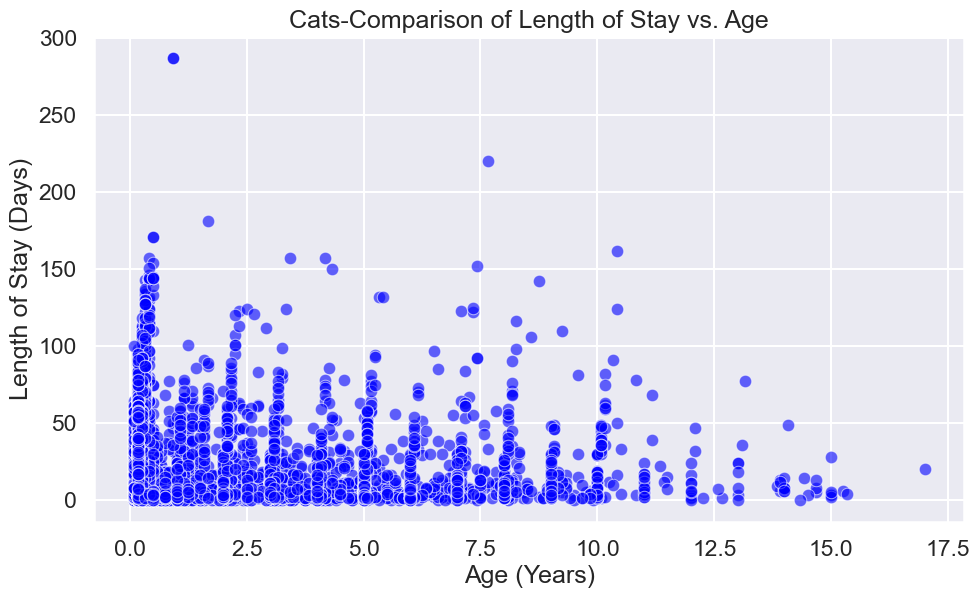

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cats["Age (Years)"], y=df_cats["length of stay"], alpha=0.6, color="blue")

plt.ylabel("Length of Stay (Days)")
plt.title("Cats-Comparison of Length of Stay vs. Age")

plt.show()

In [66]:
df_dogs["Age (Years)"] = df_dogs["Age (Months)"] / 12  


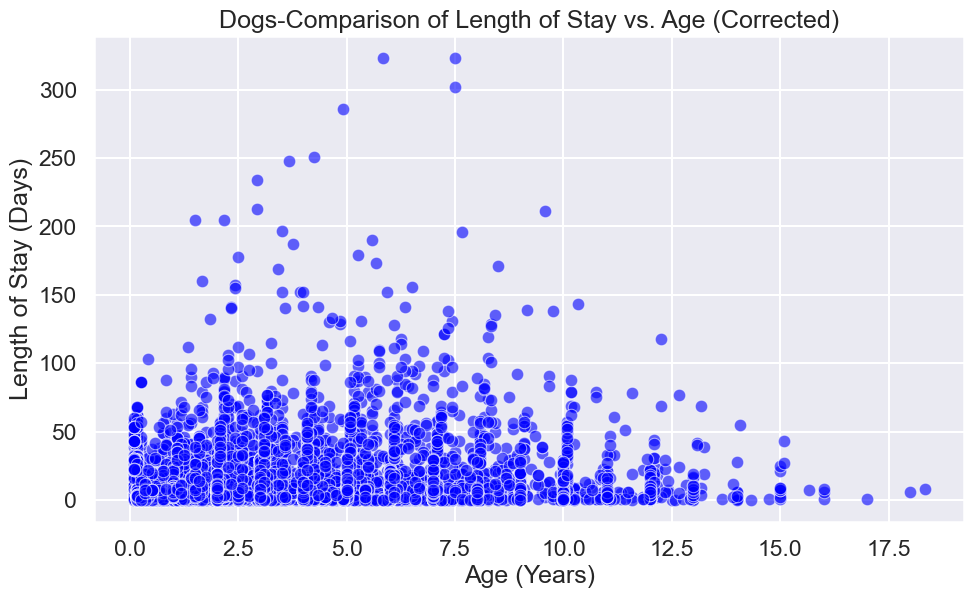

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_dogs["Age (Years)"], y=df_dogs["length of stay"], alpha=0.6, color="blue")

plt.ylabel("Length of Stay (Days)")
plt.title("Dogs-Comparison of Length of Stay vs. Age (Corrected)")

plt.show()


/var/folders/t5/ksv476hn4cq52bmfy8685cnh0000gn/T/ipykernel_44162/3475408395.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




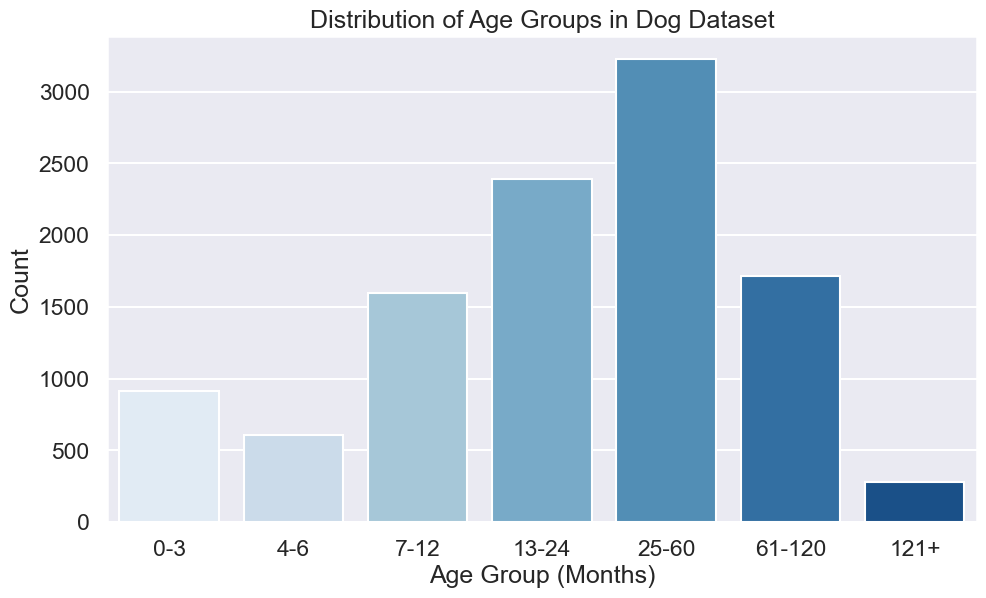

In [68]:
bins = [0, 3, 6, 12, 24, 60, 120, 204]  
bin_labels = ["0-3", "4-6", "7-12", "13-24", "25-60", "61-120", "121+"]  


df_dogs["Age Group"] = pd.cut(df_dogs["Age (Months)"], bins=bins, labels=bin_labels, include_lowest=True)


age_counts = df_dogs["Age Group"].value_counts().sort_index()


plt.figure(figsize=(10, 6)) 
sns.barplot(x=age_counts.index, y=age_counts.values, palette="Blues")


plt.xlabel("Age Group (Months)")
plt.ylabel("Count")
plt.title("Distribution of Age Groups in Dog Dataset")
plt.xticks(rotation=0)  

plt.show()

In [69]:
df_cats.head(10)

,Outcome Date,Name,Species,Primary Breed,Sex,Primary Color,Pattern,Age (Months),Altered,Altered before arrival,Outcome Type,Intake Date,Intake Type,length of stay,Age Group,Age (Years)
0,2021-01-01,Nova,Cat,Domestic Shorthair,Female,Brown,NaN,48,No,Yes,Adoption,2020-12-17,Owner/Guardian Surrender,15,25-60,4.000000
2,2021-01-01,Tinsel,Cat,Domestic Longhair,Female,Black,NaN,3,Yes,No,Adoption,2020-12-04,Stray,28,0-3,0.250000
3,2021-01-01,Mustard,Cat,Domestic Shorthair,Male,Orange,NaN,5,Yes,No,Adoption,2020-12-03,Stray,29,4-6,0.416667
4,2021-01-01,Dionne,Cat,Domestic Shorthair,Female,Grey,Tabby,3,Yes,No,Adoption,2020-12-28,Stray,4,0-3,0.250000
6,2021-01-01,Ranger,Cat,Domestic Shorthair,Female,Orange,Tabby,2,Yes,No,Adoption,2020-10-25,Stray,68,0-3,0.166667
7,2021-01-01,Siam,Cat,Domestic Shorthair,Male,Brown,Tabby,2,Yes,No,Adoption,2020-11-27,Stray,35,0-3,0.166667
8,2021-01-01,Tahiti,Cat,Domestic Shorthair,Female,Brown,Tabby,2,Yes,No,Adoption,2020-11-27,Stray,35,0-3,0.166667
9,2021-01-01,Pompeii,Cat,Domestic Shorthair,Male,Orange,Tabby,2,Yes,No,Adoption,2020-11-27,Stray,35,0-3,0.166667
10,2021-01-01,Granger,Cat,Domestic Shorthair,Female,Orange,Tabby,2,Yes,No,Adoption,2020-10-25,Stray,68,0-3,0.166667
11,2021-01-01,Mini,Cat,Domestic Shorthair,Female,Black,NaN,2,Yes,No,Adoption,2020-11-16,Stray,46,0-3,0.166667


In [70]:
df_dogs_years = df_dogs["Age (Months)"] / 12  
df_dogs_years

1        3.000000
5        2.583333
21       7.000000
27       3.000000
28       4.000000
           ...   
27622    5.000000
27623    0.500000
27627    1.166667
27628    2.000000
27630    0.333333
Name: Age (Months), Length: 10733, dtype: float64

In [71]:
df_cats_years = df_cats["Age (Months)"] / 12  
df_cats_years

0        4.000000
2        0.250000
3        0.416667
4        0.250000
6        0.166667
           ...   
27631    0.166667
27632    0.166667
27633    0.416667
27634    0.500000
27635    0.500000
Name: Age (Months), Length: 16903, dtype: float64

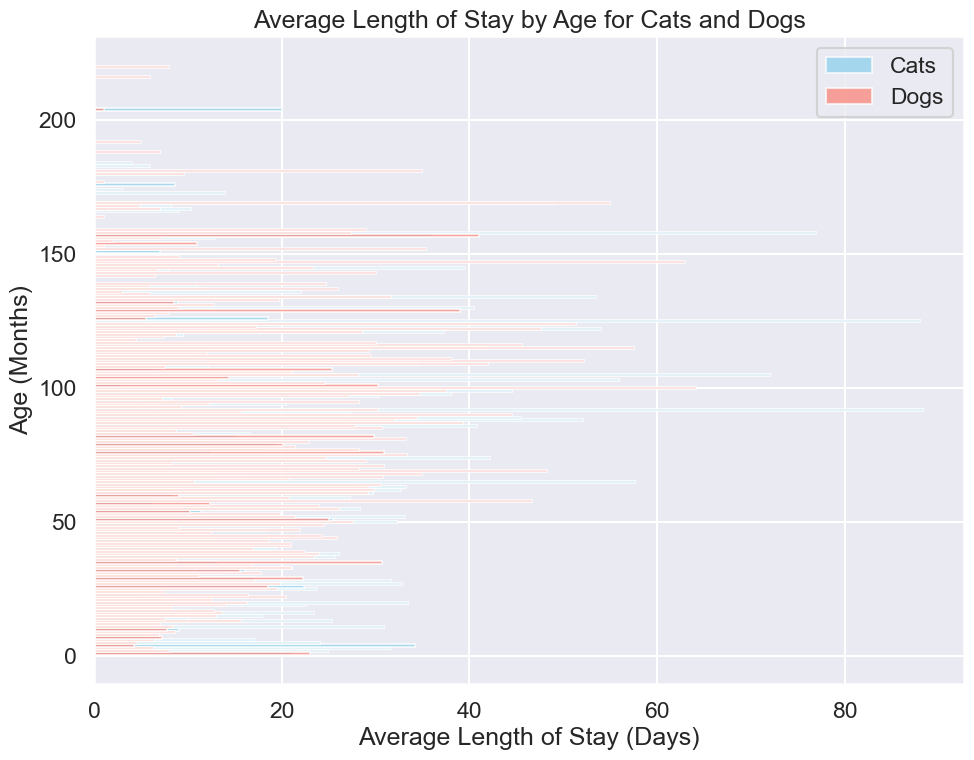

In [72]:
cats_age_grouped = df_cats.groupby("Age (Months)")["length of stay"].mean()
dogs_age_grouped = df_dogs.groupby("Age (Months)")["length of stay"].mean()


plt.figure(figsize=(10, 8))


plt.barh(cats_age_grouped.index, cats_age_grouped.values, label="Cats", color="skyblue", alpha=0.7)
plt.barh(dogs_age_grouped.index, dogs_age_grouped.values, label="Dogs", color="salmon", alpha=0.7)


plt.xlabel("Average Length of Stay (Days)")
plt.ylabel("Age (Months)")
plt.title("Average Length of Stay by Age for Cats and Dogs")
plt.legend()

plt.show()


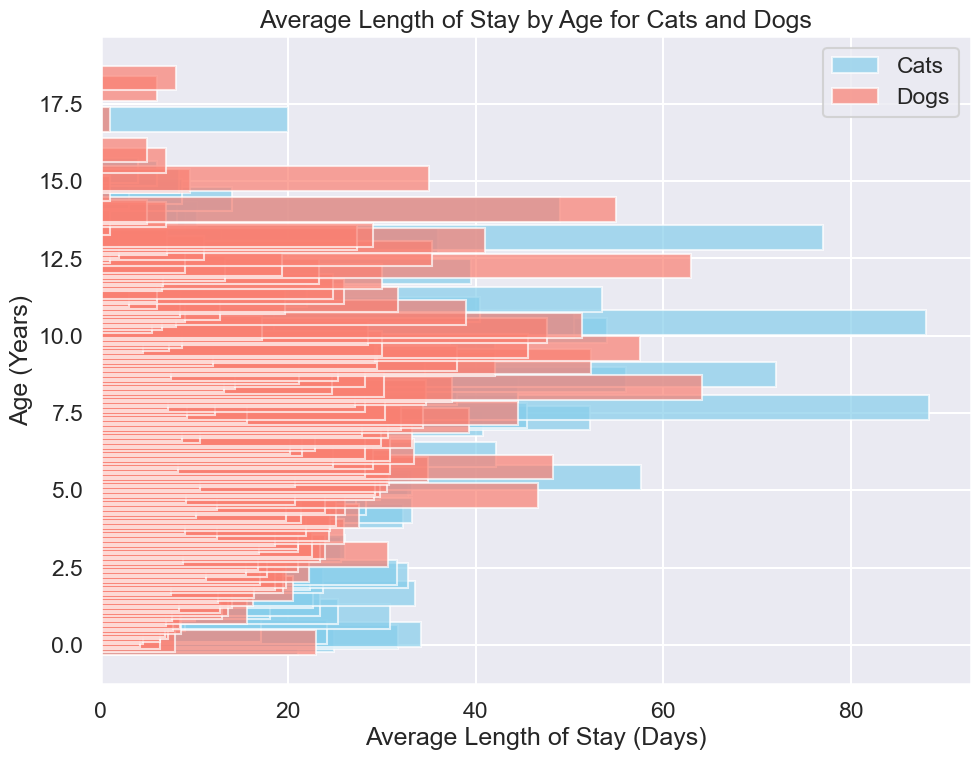

In [73]:

df_cats["Age (Years)"] = df_cats["Age (Months)"] / 12
df_dogs["Age (Years)"] = df_dogs["Age (Months)"] / 12


cats_age_grouped = df_cats.groupby("Age (Years)")["length of stay"].mean()
dogs_age_grouped = df_dogs.groupby("Age (Years)")["length of stay"].mean()


plt.figure(figsize=(10, 8))


plt.barh(cats_age_grouped.index, cats_age_grouped.values, label="Cats", color="skyblue", alpha=0.7)
plt.barh(dogs_age_grouped.index, dogs_age_grouped.values, label="Dogs", color="salmon", alpha=0.7)


plt.xlabel("Average Length of Stay (Days)")
plt.ylabel("Age (Years)")
plt.title("Average Length of Stay by Age for Cats and Dogs")
plt.legend()


plt.show()


## Outcome Charts

In [74]:
cat_outcome_counts = data_cats['Outcome Type'].value_counts()
cat_outcome_counts

Outcome Type
Adoption                    16695
Return to Owner/Guardian      208
Name: count, dtype: int64

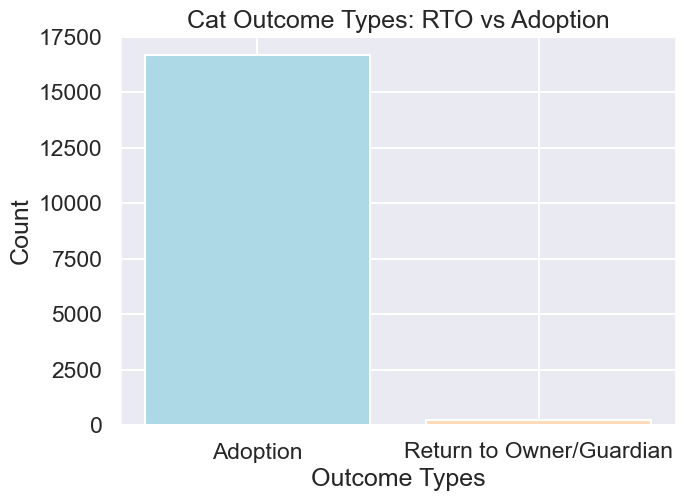

In [75]:
plt.bar(cat_outcome_counts.index, cat_outcome_counts.values, color=['lightblue', 'peachpuff'])
plt.xlabel('Outcome Types')
plt.ylabel('Count')
plt.title('Cat Outcome Types: RTO vs Adoption')
plt.show()

In [76]:
dog_outcome_counts = data_dogs['Outcome Type'].value_counts()
dog_outcome_counts

Outcome Type
Adoption                    9537
Return to Owner/Guardian    1196
Name: count, dtype: int64

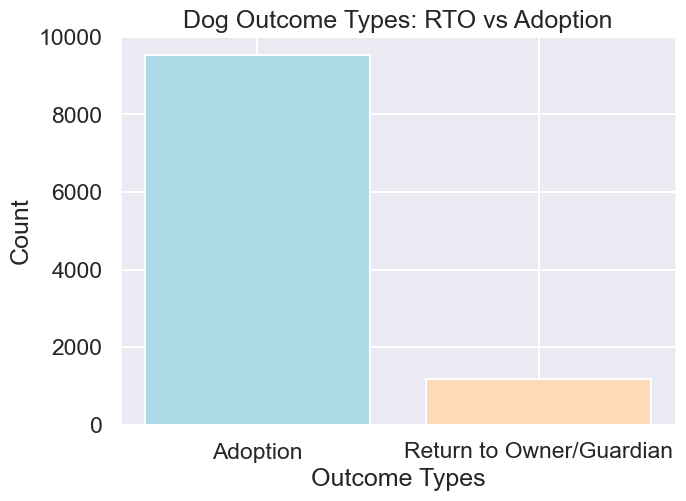

In [77]:
plt.bar(dog_outcome_counts.index, dog_outcome_counts.values, color=['lightblue', 'peachpuff'])
plt.xlabel('Outcome Types')
plt.ylabel('Count')
plt.title('Dog Outcome Types: RTO vs Adoption')
plt.show()

## Intake Charts

In [78]:
df_cats.head()

,Outcome Date,Name,Species,Primary Breed,Sex,Primary Color,Pattern,Age (Months),Altered,Altered before arrival,Outcome Type,Intake Date,Intake Type,length of stay,Age Group,Age (Years)
0,2021-01-01,Nova,Cat,Domestic Shorthair,Female,Brown,NaN,48,No,Yes,Adoption,2020-12-17,Owner/Guardian Surrender,15,25-60,4.000000
2,2021-01-01,Tinsel,Cat,Domestic Longhair,Female,Black,NaN,3,Yes,No,Adoption,2020-12-04,Stray,28,0-3,0.250000
3,2021-01-01,Mustard,Cat,Domestic Shorthair,Male,Orange,NaN,5,Yes,No,Adoption,2020-12-03,Stray,29,4-6,0.416667
4,2021-01-01,Dionne,Cat,Domestic Shorthair,Female,Grey,Tabby,3,Yes,No,Adoption,2020-12-28,Stray,4,0-3,0.250000
6,2021-01-01,Ranger,Cat,Domestic Shorthair,Female,Orange,Tabby,2,Yes,No,Adoption,2020-10-25,Stray,68,0-3,0.166667


In [79]:
df_dogs["Intake Type"] = df_dogs["Intake Type"].replace("Owner/Guardian Surrender", "Owner")

df_dogs.to_csv("updated_file.csv", index=False)

In [80]:
df_cats["Intake Type"] = df_dogs["Intake Type"].replace("Owner/Guardian Surrender", "Owner")

df_cats.to_csv("updated_file.csv", index=False)

In [81]:
df_cats["Intake Type"] = df_cats["Intake Type"].replace("Transfer In", "Transfer")

df_cats.to_csv("updated_file.csv", index=False)

In [82]:
df_cats.columns


Index(['Outcome Date', 'Name', 'Species', 'Primary Breed', 'Sex',
       'Primary Color', 'Pattern', 'Age (Months)', 'Altered',
       'Altered before arrival', 'Outcome Type', 'Intake Date', 'Intake Type',
       'length of stay', 'Age Group', 'Age (Years)'],
      dtype='object')

In [83]:

cat_intake_counts = df_cats['Intake Type'].value_counts()
cat_intake_counts

Series([], Name: count, dtype: int64)

In [84]:
print(cat_intake_counts)


Series([], Name: count, dtype: int64)


In [85]:
cat_intake_counts = data_cats['Intake Type'].value_counts()
cat_intake_counts

Intake Type
Stray                       11853
Owner/Guardian Surrender     3018
Transfer In                  1316
Return                        681
Service In                     23
Born In Care                   11
Wildlife In                     1
Name: count, dtype: int64

In [86]:
data_cats["Intake Type"] = data_cats["Intake Type"].replace("Owner/Guardian Surrender", "Owner")

data_cats.to_csv("updated_file.csv", index=False)

In [87]:
cat_intake_counts_1 = data_cats['Intake Type'].value_counts()
cat_intake_counts_1

Intake Type
Stray           11853
Owner            3018
Transfer In      1316
Return            681
Service In         23
Born In Care       11
Wildlife In         1
Name: count, dtype: int64

In [88]:
dog_intake_counts = df_dogs['Intake Type'].value_counts()
dog_intake_counts


Intake Type
Stray           6009
Owner           2672
Return          1219
Transfer In      727
Service In       100
Born In Care       6
Name: count, dtype: int64

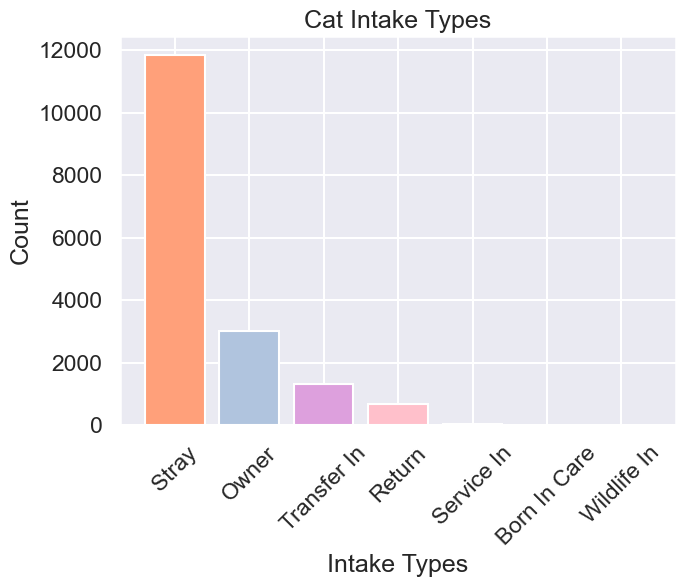

In [89]:
plt.bar(cat_intake_counts_1.index, cat_intake_counts_1.values, color=['lightsalmon', 'lightsteelblue', 'plum', 'pink', 'orange', 'grey', 'red'])
plt.xlabel('Intake Types')
plt.ylabel('Count')
plt.title('Cat Intake Types')
plt.xticks(rotation=45) 
plt.show()

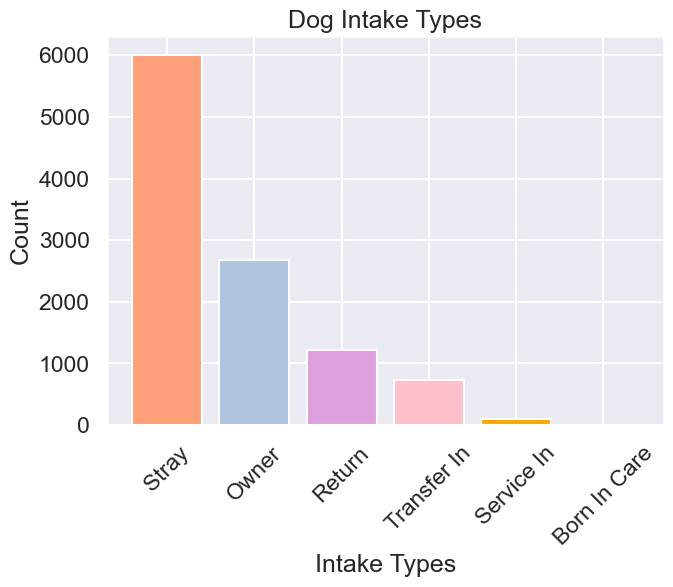

In [90]:
plt.bar(dog_intake_counts.index, dog_intake_counts.values, color=['lightsalmon', 'lightsteelblue', 'plum', 'pink', 'orange', 'grey', 'red'])
plt.xlabel('Intake Types')
plt.ylabel('Count')
plt.title('Dog Intake Types')
plt.xticks(rotation=45) 
plt.show()

## Cat Colors Chart

In [91]:
cat_top_10_colors = df_cats['Primary Color'].value_counts().nlargest(10)
cat_top_10_colors

Primary Color
Black       5765
Grey        3346
Brown       2978
Orange      1724
White       1239
Calico       614
Tan          309
Tortoise     292
Cream        188
Torbie       113
Name: count, dtype: int64

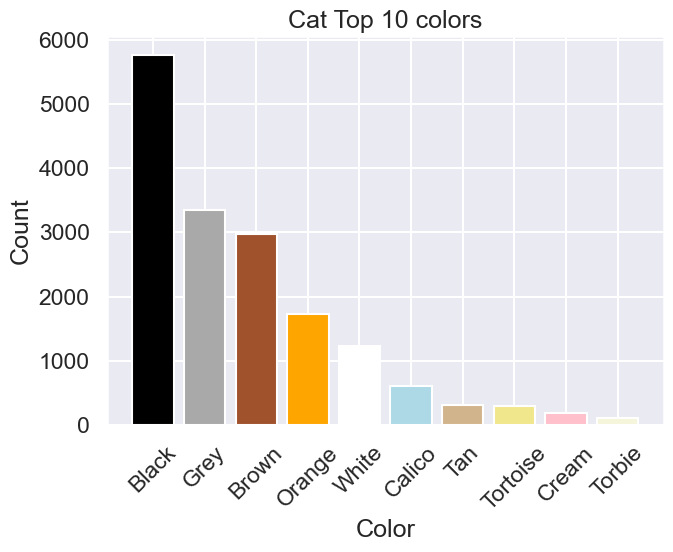

In [92]:
plt.bar(cat_top_10_colors.index, cat_top_10_colors.values, color=['black', 'darkgrey', 'sienna', 'orange', 'white', 'lightblue', 'tan', 'khaki', 'pink', 'beige'])
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Cat Top 10 colors')
plt.xticks(rotation=45) 
plt.show()

## Dog color chart

In [93]:
dog_top_10_colors = df_dogs['Primary Color'].value_counts().nlargest(10)
dog_top_10_colors

Primary Color
Black           2913
Brown           1984
Tan             1883
White           1643
Grey             769
Brindle          630
Red/Mahogany     150
Chocolate        111
Golden           102
Blue              74
Name: count, dtype: int64

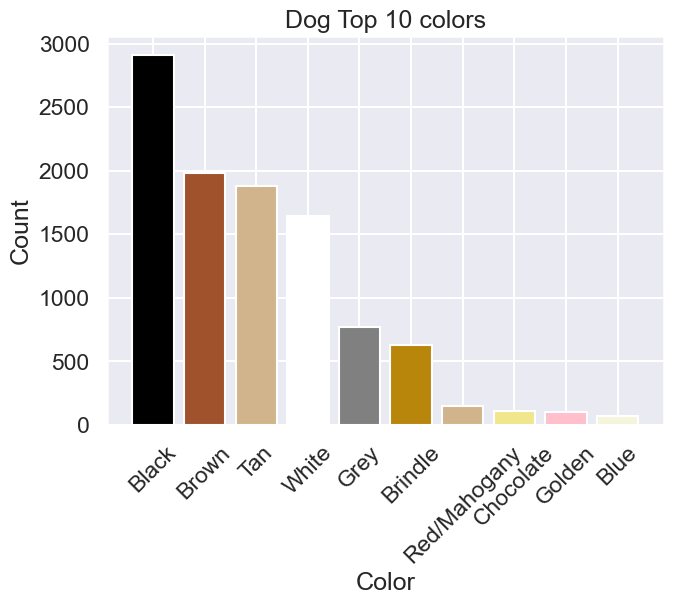

In [94]:
plt.bar(dog_top_10_colors.index, dog_top_10_colors.values, color=['black', 'sienna', 'tan', 'white', 'grey', 'darkgoldenrod', 'tan', 'khaki', 'pink', 'beige'])
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Dog Top 10 colors')
plt.xticks(rotation=45) 
plt.show()

## Breed Charts

In [95]:
cat_breed_counts = df_cats['Primary Breed'].value_counts()
cat_breed_counts

Primary Breed
Domestic Shorthair      15535
Domestic Medium Hair     1002
Domestic Longhair         358
American Shorthair          7
Siamese                     1
Name: count, dtype: int64

In [96]:
dog_breed_counts = df_dogs['Primary Breed'].value_counts()
dog_breed_counts

Primary Breed
Mixed Breed (Medium)         5628
Mixed Breed (Large)          2548
Mixed Breed (Small)          2546
Boxer                           2
Retriever, Black Labrador       2
Terrier                         2
Hound, Bloodhound               1
Hound, Basset                   1
Retriever, Labrador             1
Beagle                          1
Pekingese                       1
Name: count, dtype: int64

In [97]:
dog_top_6_breeds = df_dogs['Primary Breed'].value_counts().nlargest(6)
dog_top_6_breeds

Primary Breed
Mixed Breed (Medium)         5628
Mixed Breed (Large)          2548
Mixed Breed (Small)          2546
Boxer                           2
Retriever, Black Labrador       2
Terrier                         2
Name: count, dtype: int64

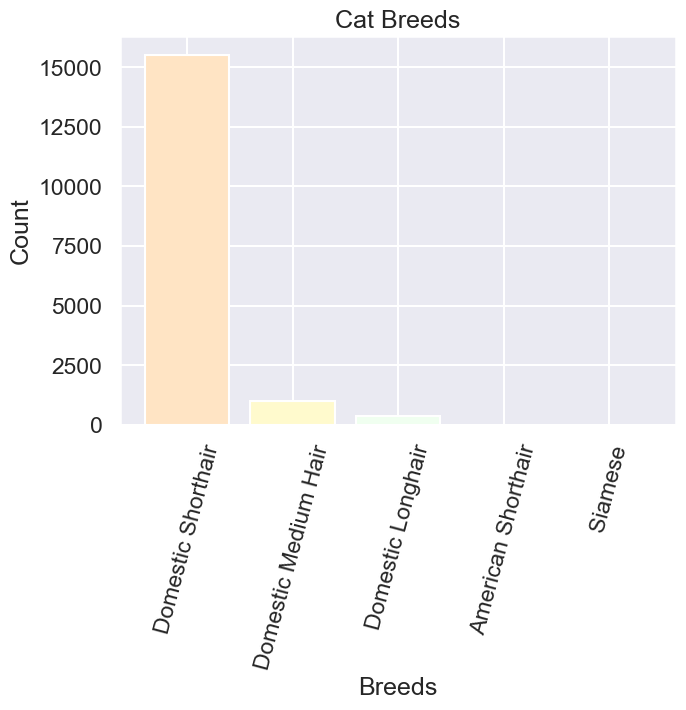

In [98]:
plt.bar(cat_breed_counts.index, cat_breed_counts.values, color=['bisque', 'lemonchiffon', 'honeydew', 'thistle', 'lightcyan', 'pink'])
plt.xlabel('Breeds')
plt.ylabel('Count')
plt.title('Cat Breeds')
plt.xticks(rotation=75) 
plt.show()

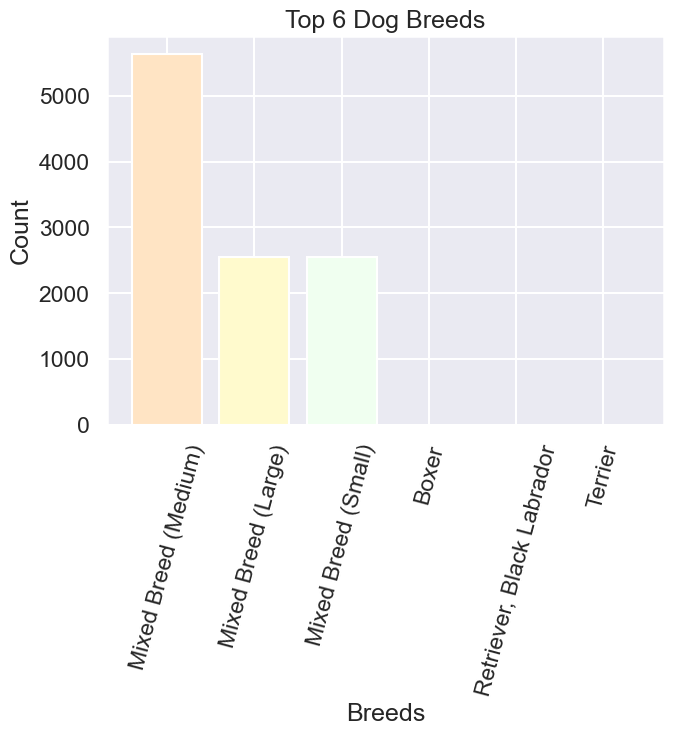

In [99]:
plt.bar(dog_top_6_breeds.index, dog_top_6_breeds.values, color=['bisque', 'lemonchiffon', 'honeydew', 'thistle', 'lightcyan', 'pink'])
plt.xlabel('Breeds')
plt.ylabel('Count')
plt.title('Top 6 Dog Breeds')
plt.xticks(rotation=75) 
plt.show()

## Cat Stats Testing

In [100]:
from scipy.stats import chi2_contingency

black_count = (df_cats["Primary Color"] == "Black").sum()
other_count = (df_cats["Primary Color"] != "Black").sum()


observed = [[black_count, other_count]]


chi2, p, dof, expected = chi2_contingency(observed)


print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:", expected)


alpha = 0.05  
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between color and frequency.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Chi-Square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 0
Expected Frequencies Table: [[  5765.  11138.]]
Fail to reject the null hypothesis: No significant association found.


In [101]:
contingency_table = pd.crosstab(df_cats["Primary Color"] == "Black", df_cats["Outcome Type"])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:\n", expected)

Chi-Square Statistic: 0.004217066951411632
P-value: 0.9482226101021378
Degrees of Freedom: 1
Expected Frequencies Table:
 [[ 11000.94125303    137.05874697]
 [  5694.05874697     70.94125303]]


## Chi square test Summary-

In [102]:
cat_black_animals = df_cats[df_cats["Primary Color"] == "Black"]["length of stay"]
cat_non_black_animals = df_cats[df_cats["Primary Color"] != "Black"]["length of stay"]

In [103]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(cat_black_animals, cat_non_black_animals, equal_var=False)


print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: 3.223940164309161
P-Value: 0.0012679376288480659


## T Test Summary

In [104]:

df_cats["Primary Color"] = df_cats["Primary Color"].astype("category")


df_cats = df_cats.dropna(subset=["Primary Color", "Age (Months)"])


print("Unique Primary Colors:", df_cats["Primary Color"].unique())
print(df_cats[["Primary Color", "Age (Months)"]].describe())


Unique Primary Colors: ['Brown', 'Black', 'Orange', 'Grey', 'Calico', ..., 'Ruddy', 'Smoke', 'Silver Black', 'Shaded Blue Cream Cameo', 'Lynx']
Length: 35
Categories (35, object): ['Albino', 'Apricot', 'Black', 'Blonde', ..., 'Tortoise', 'Wheaten', 'White', 'Yellow']
       Age (Months)
count  16903.000000
mean      11.667515
std       22.758136
min        1.000000
25%        2.000000
50%        2.000000
75%        6.000000
max      204.000000


In [105]:
cat_groups = [df_cats["Age (Months)"][df_cats["Primary Color"] == color] for color in df_cats["Primary Color"].unique()]


f_stat, p_value = stats.f_oneway(*cat_groups)


print(f"ANOVA Test Results:\nF-statistic: {f_stat:.4f}, P-value: {p_value:.4f}")


ANOVA Test Results:
F-statistic: 3.4036, P-value: 0.0000


## Anova Summary-

## Dog Stats Testing

In [106]:
from scipy.stats import chi2_contingency

black_count = (df_dogs["Primary Color"] == "Black").sum()
other_count = (df_dogs["Primary Color"] != "Black").sum()


observed = [[black_count, other_count]]


chi2, p, dof, expected = chi2_contingency(observed)


print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:", expected)


alpha = 0.05  
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between color and frequency.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Chi-Square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 0
Expected Frequencies Table: [[ 2913.  7820.]]
Fail to reject the null hypothesis: No significant association found.


In [107]:
contingency_table = pd.crosstab(df_dogs["Primary Color"] == "Black", df_dogs["Outcome Type"])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:\n", expected)

Chi-Square Statistic: 4.903265372071489e-05
P-value: 0.9944129930491566
Degrees of Freedom: 1
Expected Frequencies Table:
 [[ 6948.60150936   871.39849064]
 [ 2588.39849064   324.60150936]]


## Chi square Test Summary_

In [108]:
dog_black_animals = df_dogs[df_dogs["Primary Color"] == "Black"]["length of stay"]
dog_non_black_animals = df_dogs[df_dogs["Primary Color"] != "Black"]["length of stay"]

In [109]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(cat_black_animals, cat_non_black_animals, equal_var=False)


print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: 3.223940164309161
P-Value: 0.0012679376288480659


### T Test Summary-

In [110]:

df_dogs["Primary Color"] = df_dogs["Primary Color"].astype("category")


df_dogs = df_dogs.dropna(subset=["Primary Color", "Age (Months)"])


print("Unique Primary Colors:", df_dogs["Primary Color"].unique())
print(df_cats[["Primary Color", "Age (Months)"]].describe())


Unique Primary Colors: ['Black', 'White', 'Tan', 'Brindle', 'Brown', ..., 'Yellow', 'Wheaten', 'Cream', 'Blue Black', 'Apricot']
Length: 21
Categories (21, object): ['Apricot', 'Beige', 'Black', 'Blond', ..., 'Tan', 'Wheaten', 'White', 'Yellow']
       Age (Months)
count  16903.000000
mean      11.667515
std       22.758136
min        1.000000
25%        2.000000
50%        2.000000
75%        6.000000
max      204.000000


In [111]:
dog_groups = [df_dogs["Age (Months)"][df_dogs["Primary Color"] == color] for color in df_dogs["Primary Color"].unique()]


f_stat, p_value = stats.f_oneway(*dog_groups)


print(f"ANOVA Test Results:\nF-statistic: {f_stat:.4f}, P-value: {p_value:.4f}")


ANOVA Test Results:
F-statistic: 5.2869, P-value: 0.0000


## Anova Test Summary

# Machine Learning

In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression  
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Objectives:
* See if coat color effects adoption rate/stay
* See if coat color can predict adoption rate
* see if coat color impacts how pet is affected

In [132]:
def prepare_ml_data(df):
    # Create a copy
    df_ml = df.copy()
    
    # Handle missing values
    df_ml['Age (Months)'] = df_ml['Age (Months)'].fillna(df_ml['Age (Months)'].median())
    df_ml['Primary Color'] = df_ml['Primary Color'].fillna('Unknown')
    df_ml['Sex'] = df_ml['Sex'].fillna('Unknown')
    df_ml['Altered'] = df_ml['Altered'].fillna('No')
    
    # Create binary target for adoption
    df_ml['adopted'] = (df_ml['Outcome Type'] == 'Adoption').astype(int)
    
    # Define dark colors
    dark_colors = {
        'Black', 'Blue', 'Grey', 'Seal', 'Charcoal', 'Chocolate', 'Liver',
        'Blue Black', 'Smoke', 'Silver Black', 'Mahogany', 'Red/Mahogany',
        'Brindle', 'Ruddy', 'Sable'
    }

    # Create binary features
    df_ml['is_black'] = (df_ml['Primary Color'] == 'Black').astype(int)
    df_ml['is_dark_color'] = df_ml['Primary Color'].isin(dark_colors).astype(int)

    # Encode categorical variables
    cat_columns = ['Species', 'Primary Color', 'Sex', 'Altered', 'Intake Type']
    for col in cat_columns:
        if col in df_ml.columns:
            le = LabelEncoder()
            df_ml[f'{col}_encoded'] = le.fit_transform(df_ml[col].astype(str))
    
    # Select features for ML
    features = ['Age (Months)', 'is_black', 'is_dark_color']
    
    # Add encoded features if they exist
    encoded_features = ['Sex_encoded', 'Altered_encoded', 'Intake Type_encoded']
    for feat in encoded_features:
        if feat in df_ml.columns:
            features.append(feat)
    
    if 'Species_encoded' in df_ml.columns:
        features.append('Species_encoded')
    
    return df_ml, features


In [134]:
def predict_length_of_stay(df):
    # Prepare data
    df_ml, features = prepare_ml_data(df)
    
    # Filter out missing length of stay
    df_ml = df_ml.dropna(subset=['length of stay'])
    
    X = df_ml[features]
    y = df_ml['length of stay']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

    
    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    return model, features, rmse, r2, feature_importance


In [114]:
def predict_adoption_rate(df):
    # Prepare data
    df_ml, features = prepare_ml_data(df)
    
    X = df_ml[features]
    y = df_ml['adopted']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Feature importance (coefficients)
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': np.abs(model.coef_[0])
    }).sort_values('importance', ascending=False)
    
    return model, scaler, features, accuracy, report, feature_importance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_color_impact_ml(df, color_col='is_dark_color'):
    df, _ = prepare_ml_data(df)

    # Validate
    if color_col not in df.columns:
        raise ValueError(f"Column '{color_col}' not found in dataframe.")
    
    # Clean and filter
    df['length of stay'] = pd.to_numeric(df['length of stay'], errors='coerce')
    df_valid = df[df['length of stay'].notna() & df[color_col].isin([0, 1])]

    # Helper: summary stats
    def get_stats(group_df):
        return {
            'Avg Length of Stay': group_df['length of stay'].mean(),
            'Median Length of Stay': group_df['length of stay'].median(),
            'Adoption Rate (%)': 100 * (group_df['Outcome Type'] == 'Adoption').mean()
        }

    # Compute stats
    group1_stats = get_stats(df_valid[df_valid[color_col] == 1])
    group0_stats = get_stats(df_valid[df_valid[color_col] == 0])

    # Label based on input
    label1 = 'Black' if color_col == 'is_black' else 'Dark-Colored'
    label0 = 'Non-Black' if color_col == 'is_black' else 'Non-Dark'

    # Comparison table
    comparison = pd.DataFrame({
        label1: group1_stats,
        label0: group0_stats
    })

    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot: Avg Length of Stay
    comparison.loc[['Avg Length of Stay']].T.plot(kind='bar', ax=ax1)
    ax1.set_title(f'Avg Length of Stay: {label1} vs {label0}')
    ax1.set_ylabel('Days')
    ax1.set_xlabel('Pet Color Group')
    ax1.legend().remove()

    # Plot: Adoption Rate
    comparison.loc[['Adoption Rate (%)']].T.plot(kind='bar', ax=ax2)
    ax2.set_title(f'Adoption Rate: {label1} vs {label0}')
    ax2.set_ylabel('Percent')
    ax2.set_xlabel('Pet Color Group')
    ax2.set_ylim(80, 100)
    ax2.legend().remove()

    plt.tight_layout()
    plt.show()

    return comparison


In [117]:
# Combine datasets for ML
# Create copies to avoid modifying original data
df_cats_copy = df_cats.copy()
df_dogs_copy = df_dogs.copy()

df_cats_copy['Species'] = 'Cat'
df_dogs_copy['Species'] = 'Dog'

In [119]:
combined_data = pd.concat([df_cats_copy, df_dogs_copy], ignore_index=True)
print(f"Combined dataset shape: {combined_data.shape}")

Combined dataset shape: (27636, 16)


In [135]:
print("\nLength of Stay Prediction Model")
try:
    model_stay, features_stay, rmse, r2, importance_stay = predict_length_of_stay(combined_data)
    print(f"RMSE: {rmse:.2f} days")
    print(f"R² Score: {r2:.3f}")
    print("\nTop 5 Most Important Features for Length of Stay:")
    print(importance_stay.head())
except Exception as e:
    print(f"Error in length of stay prediction: {e}")


Length of Stay Prediction Model
RMSE: 21.87 days
R² Score: 0.134

Top 5 Most Important Features for Length of Stay:
               feature  importance
0         Age (Months)    0.530600
5  Intake Type_encoded    0.129032
4      Altered_encoded    0.116973
3          Sex_encoded    0.072807
6      Species_encoded    0.054333


Findings:
- Strongest factors are age, intake type, and altered status.
- Color-based features like is_black or is_dark_color probably contribute minimally which is consistent with the idea that they're secondary or contextual factors.
- The low R² means there’s room for richer data (e.g., behavioral notes, breed, photos, shelter location, bio text, etc).

In [136]:
print("\nAdoption Rate Prediction Model")
try:
    model_adoption, scaler_adoption, features_adoption, accuracy, report, importance_adoption = predict_adoption_rate(combined_data)
    print(f"Accuracy: {accuracy:.3f}")
    print("\nTop 5 Most Important Features for Adoption Rate:")
    print(importance_adoption.head())
except Exception as e:
    print(f"Error in adoption rate prediction: {e}")


Adoption Rate Prediction Model
Accuracy: 0.953

Top 5 Most Important Features for Adoption Rate:
               feature  importance
6      Species_encoded    1.283594
5  Intake Type_encoded    0.471996
0         Age (Months)    0.463593
4      Altered_encoded    0.248257
3          Sex_encoded    0.119662


In [138]:
print(report)

              precision    recall  f1-score   support

           0       0.62      0.03      0.06       262
           1       0.95      1.00      0.98      5266

    accuracy                           0.95      5528
   macro avg       0.78      0.51      0.52      5528
weighted avg       0.94      0.95      0.93      5528



Although the model achieved high accuracy (95.3%), it struggled to identify animals that were not adopted with a recall of just 3% for that class. This is a common issue with imbalanced datasets. The model learns to predict adoption for nearly all animals because it's statistically "safe" to do so. Future versions will rebalance the dataset and reintroduce visual traits like coat color to better investigate what factors (if any) influence non-adoption.


Color Impact Analysis


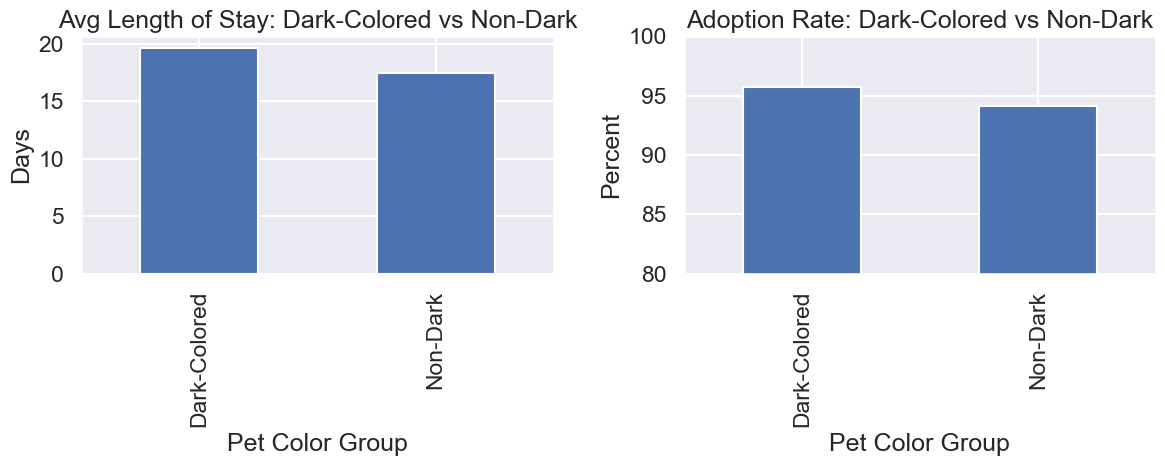

                       Dark-Colored   Non-Dark
Avg Length of Stay        19.651049  17.421056
Median Length of Stay      9.000000   7.000000
Adoption Rate (%)         95.711093  94.121921


In [153]:
print(f"\nColor Impact Analysis")
try:
    comparison = analyze_color_impact_ml(combined_data)
    print(comparison)
except Exception as e:
    print(f"Error in impact analysis: {e}")


Dark-colored pets are adopted at nearly the same rate (or slightly higher), but they tend to stay 2–3 days longer in the shelter on average. This supports the idea that darker animals may be slightly less immediately appealing, but they are not fundamentally less adoptable.

In [ ]:
from scipy.stats import ttest_ind

def run_color_stay_ttest(df, color_col='is_black'):
    try:
        df, _ = prepare_ml_data(df=df)
        group1 = df[df[color_col] == 1]['length of stay'].dropna()
        group0 = df[df[color_col] == 0]['length of stay'].dropna()
        t_stat, p_value = ttest_ind(group1, group0, equal_var=False)  # Welch's t-test
        label1 = 'Black' if color_col == 'is_black' else 'Dark-Colored'
        label0 = 'Non-Black' if color_col == 'is_black' else 'Non-Dark'
        print(f"\nT-test for {label1} vs {label0} pets (length of stay):")
        print(f"T-statistic: {t_stat:.4f}")
        print(f"P-value: {p_value:.6f}")
        return t_stat, p_value
    except Exception as e:
        print(f"Error in statistical test for {color_col}: {e}")
        return None, None


In [160]:
run_color_stay_ttest(combined_data, color_col='is_black')
run_color_stay_ttest(combined_data, color_col='is_dark_color')



T-test for Black vs Non-Black pets (length of stay):
T-statistic: 5.8506
P-value: 0.000000

T-test for Dark-Colored vs Non-Dark pets (length of stay):
T-statistic: 8.4283
P-value: 0.000000


(8.428349652130013, 3.6744242885202149e-17)

Both tests produced highly statistically significant results, indicating that black and dark-colored animals, on average, stay in shelters longer than their lighter-colored counterparts.

The effect was stronger when generalized to all dark-colored animals, suggesting that the trend is not limited to animals labeled strictly as “black,” but also applies to other dark coat colors (e.g., charcoal, liver, smoke).

Despite this statistical significance, the practical difference in average length of stay is relatively modest, typically a few days longer for darker-colored pets. Moreover, adoption rates for both groups remain high (>94%), indicating that while color may delay adoption, it does not prevent it.

## ML summary

1. Black pets stay 2.2 days longer on average than non-black pets.  
   - Adoption rate: Black = 95.7%, Non-black = 94.1%  
   - T-test: p < 0.00000001 (statistically significant difference)  
   - ML importance for length of stay: is_black = 0.0599  
   - ML importance for adoption rate: is_black not in top 5 features

2. Dark-colored pets stay 2.2 days longer on average than non-dark pets.  
   - Adoption rate: Dark-colored = 95.7%, Non-dark = 94.1%  
   - T-test: p < 0.000000000000000037 (statistically significant difference)  
   - ML importance for length of stay: is_dark_color not ranked high  
   - ML importance for adoption rate: is_dark_color not ranked high

### recommendations

- Improve visibility of darker-colored pets through better photos and targeted listings.
- Run focused adoption events if lag persists in specific color groups.
- Prioritize age and intake type as more reliable predictors of outcomes.
- Reevaluate color impact periodically to monitor for changes.
